# Importing Libraries and Writing Test Functions

In [3]:
import Network
import Learning
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def linearTestData(n):
    x = np.arange(0,n)/n
    y = np.arange(0,n)/n
    x = [[i] for i in x]
    y = [[i] for i in y]
    return x,y

def linearNormalTestData(n):
    x = np.arange(0,n)/n
    y = np.arange(0,n)/n + np.random.normal(size=n)/n
    x = [[i] for i in x]
    y = [[i] for i in y]
    return x,y

def quadraticTestData(n):
    x = np.arange(0,n) /n
    y = np.arange(0,n)**2/n
    x = [[i] for i in x]
    y = [[i] for i in y]
    return x,y

def sinTestData(n):
    x = np.arange(0,n) 
    y = (np.sin(2*np.pi*x/(n))+1)/2
    x = [[i] for i in x]
    y = [[i] for i in y]
    return x,y

def MSELoss(y,ypred):
    return np.sum((y-ypred)**2)

# Quick tests on a few functions

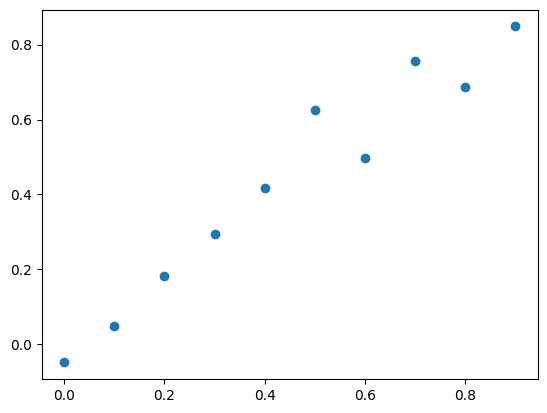

In [3]:
x,y = linearNormalTestData(10)
plt.plot(x,y,'o')

In [4]:
x,y = linearNormalTestData(100)
net = Network.network(1,1)
net.add_layer(Network.layer_dense(1,2))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(2,1))


print('Init Loss',MSELoss(y,net.forward(x)))
LossFunction = lambda net: MSELoss(y,net.forward(x))

losses,data = Learning.random_learning(net,LossFunction,100,100,0.1,0.001)
print('Final Loss',losses[-1])
print('Total Mutations',data[1])

Init Loss 33.09126366726276
Final Loss 0.010772804007398312
Total Mutations 167


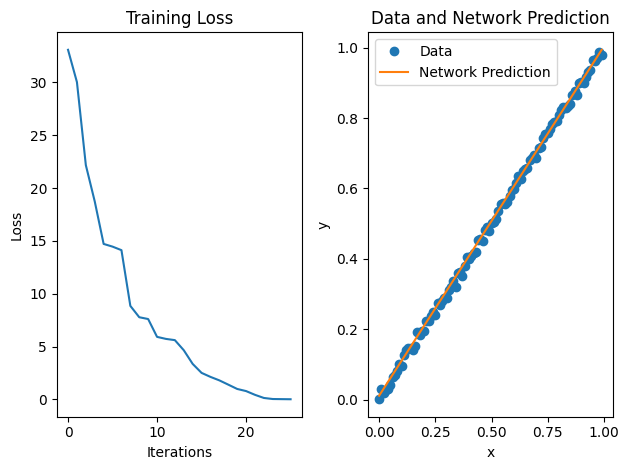

In [5]:
#plots
plt.subplot(1, 2,1)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(x, y, 'o', label='Data')
plt.plot(x, net.forward(x), label='Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Network Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
x,y = quadraticTestData(100)
net = Network.network(1,1)
net.add_layer(Network.layer_dense(1,50))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(50,50))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(50,1))
net.add_layer(Network.relu())

print('Init Loss',MSELoss(y,net.forward(x)))
LossFunction = lambda net: MSELoss(y,net.forward(x))

losses,data = Learning.random_learning(net,LossFunction,100,100,0.1,0.001)
print('Final Loss',losses[-1])
print('Total Mutations',data[1])

Init Loss 195033.33299999998
Final Loss 987.7728548248483
Total Mutations 211


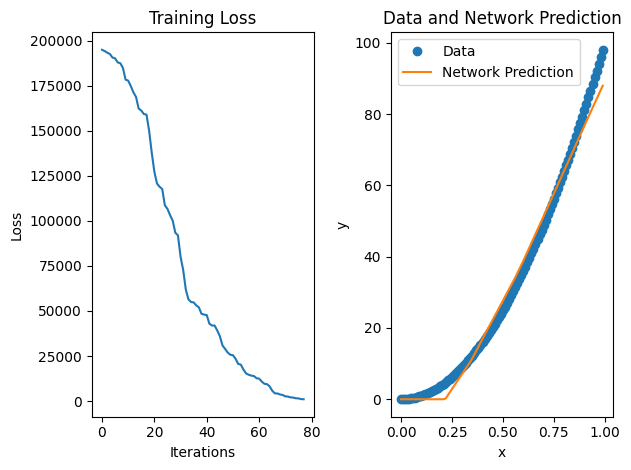

In [7]:
#plots
plt.subplot(1, 2,1)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(x, y, 'o', label='Data')
plt.plot(x, net.forward(x), label='Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Network Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
x,y = sinTestData(100)
net = Network.network(1,1)
net.add_layer(Network.layer_dense(1,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,10))
net.add_layer(Network.relu())
net.add_layer(Network.layer_dense(10,1))

print('Init Loss',MSELoss(y,net.forward(x)))
LossFunction = lambda net: MSELoss(y,net.forward(x))

losses,data = Learning.random_learning(net,LossFunction,100,100,0.1,0.001)
print('Final Loss',losses[-1])
print('Total Mutations',data[1])

Init Loss 37.50000000000001
Final Loss 5.053632409491562
Total Mutations 157


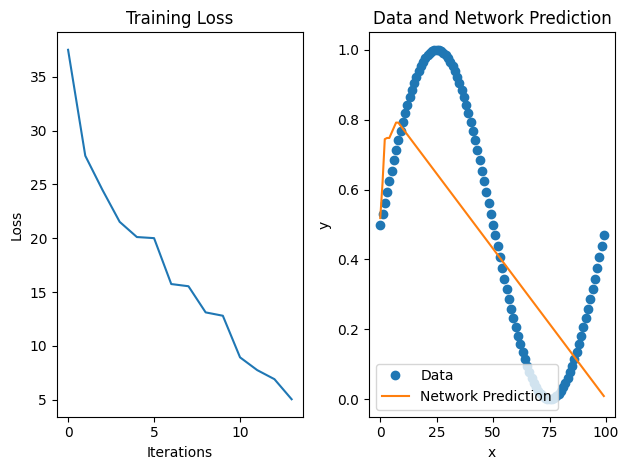

In [9]:
#plots
plt.subplot(1, 2,1)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(x, y, 'o', label='Data')
plt.plot(x, net.forward(x), label='Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Network Prediction')
plt.legend()

plt.tight_layout()
plt.show()

# Parameter Optimisation for Linear Regression
Our goal is to minimise the total mutations
From this investigation we can see that a step size of 2^-5 is a very efficient step size as well as 2^-4

In [44]:
x,y = linearTestData(100)
netLinear = Network.network(1,1)
netLinear.add_layer(Network.layer_dense(1,2))
netLinear.add_layer(Network.relu())
netLinear.add_layer(Network.layer_dense(2,1))
LossFunction = lambda net: MSELoss(y,net.forward(x))

steps = [2**(i-7) for i in range(10)]
losses = []
mutations = []

for step in steps:
    loss,data = Learning.random_learning(netLinear,LossFunction,1000,1000,step,1e-3)
    losses.append(loss)
    mutations.append(data[1])
    netLinear.reset()
    print('Step Finished',step)

Step Finished 0.0078125
Step Finished 0.015625
Step Finished 0.03125
Step Finished 0.0625
Step Finished 0.125
Step Finished 0.25
Step Finished 0.5
Step Finished 1
Step Finished 2
Step Finished 4


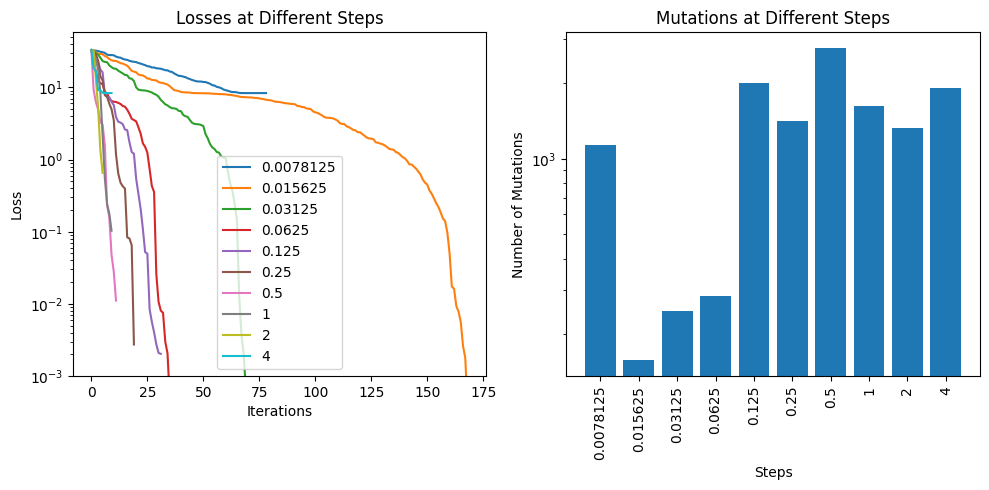

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

for i in range(len(steps)):
    plt.plot(losses[i],label=str(steps[i]))

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Losses at Different Steps')
plt.yscale('log')
plt.ylim(1e-3)
plt.legend()

# Plot the bar chart of mutations
plt.subplot(1, 2, 2)
plt.bar([str(s) for s in steps], mutations)
plt.xlabel('Steps')
plt.ylabel('Number of Mutations')
plt.title('Mutations at Different Steps')
plt.yscale('log')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [40]:
netLinear.reset()
steps = [2**(-2-i) for i in range(6)]
losses = []
mutations = []

for step in steps:
    mut = 0
    fin_loss = 0
    for i in range(10):
        loss,data = Learning.random_learning(netLinear,LossFunction,1000,1000,step,1e-3)
        fin_loss += loss[-1]
        mut += data[1]
        netLinear.reset()

    losses.append(fin_loss)
    mutations.append(mut)
    print('Step Finished',step)

Step Finished 0.25
Step Finished 0.125
Step Finished 0.0625
Step Finished 0.03125
Step Finished 0.015625
Step Finished 0.0078125


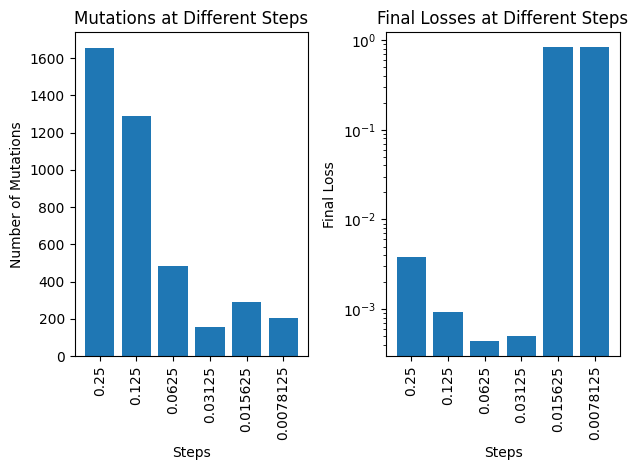

In [43]:
plt.subplot(1, 2, 1)
plt.bar([str(s) for s in steps], np.array(mutations)/10)
plt.xlabel('Steps')
plt.ylabel('Number of Mutations')
plt.title('Mutations at Different Steps')
plt.xticks(rotation=90)
#plt.yscale('log')

plt.subplot(1, 2, 2)
plt.bar([str(s) for s in steps], np.array(losses)/10)
plt.xlabel('Steps')
plt.ylabel('Final Loss')
plt.title('Final Losses at Different Steps')
plt.yscale('log')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Parameter Optimisation for Quadratic Regression
Our goal is to minimise the total mutations
From this investigation we can see that a step size of $2^{-5}$ gives the highest accuracy (4000 Mutations), with $2^{-4}$ in second (2500).

In [20]:
x,y = quadraticTestData(100)
netQuadratic = Network.network(1,1)
netQuadratic.add_layer(Network.layer_dense(1,20))
netQuadratic.add_layer(Network.relu())
netQuadratic.add_layer(Network.layer_dense(20,20))
netQuadratic.add_layer(Network.relu())
netQuadratic.add_layer(Network.layer_dense(20,1))
LossFunction = lambda net: MSELoss(y,net.forward(x))

steps = [2**(i-7) for i in range(10)]
losses = []
mutations = []

for step in steps:
    loss,data = Learning.random_learning(netQuadratic,LossFunction,1000,1000,step,1e-3)
    losses.append(loss)
    mutations.append(data[1])
    netQuadratic.reset()
    print('Step Finished',step)

Step Finished 0.0078125
Step Finished 0.015625
Step Finished 0.03125
Step Finished 0.0625
Step Finished 0.125
Step Finished 0.25
Step Finished 0.5
Step Finished 1
Step Finished 2
Step Finished 4


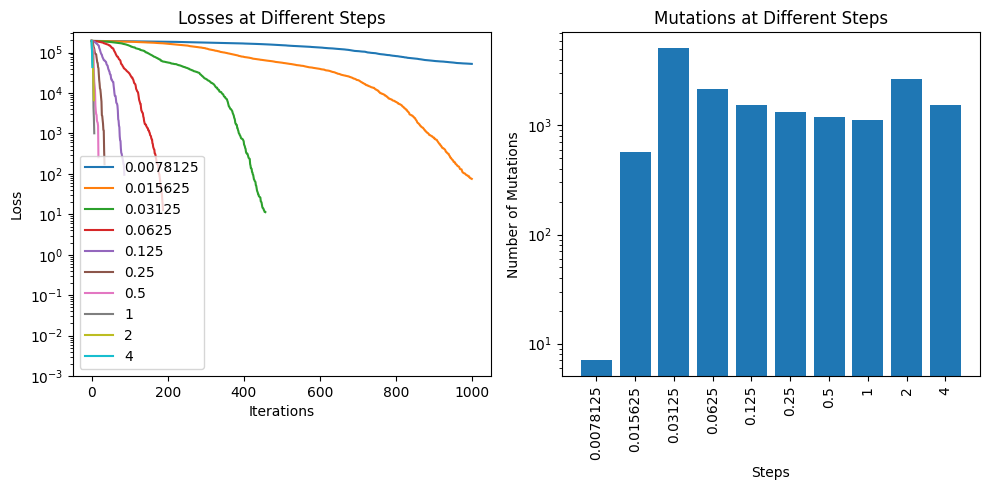

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

for i in range(len(steps)):
    plt.plot(losses[i],label=str(steps[i]))

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Losses at Different Steps')
plt.yscale('log')
plt.ylim(1e-3)
plt.legend()

# Plot the bar chart of mutations
plt.subplot(1, 2, 2)
plt.bar([str(s) for s in steps], mutations)
plt.xlabel('Steps')
plt.ylabel('Number of Mutations')
plt.title('Mutations at Different Steps')
plt.yscale('log')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [8]:
netQuadratic.reset()
steps = [2**(-3-i) for i in range(4)]
losses = []
mutations = []

for step in steps:
    mut = 0
    fin_loss = 0
    for i in range(10):
        loss,data = Learning.random_learning(netQuadratic,LossFunction,1000,1000,step,1e-3)
        fin_loss += loss[-1]
        mut += data[1]
        netQuadratic.reset()

    losses.append(fin_loss)
    mutations.append(mut)
    print('Step Finished',step)

Step Finished 0.125
Step Finished 0.0625
Step Finished 0.03125
Step Finished 0.015625


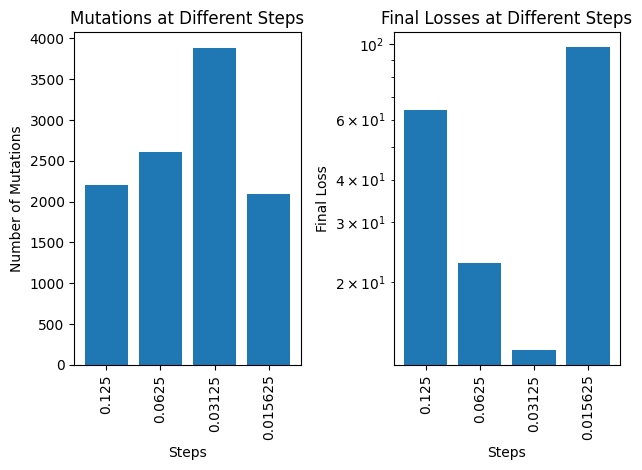

In [9]:
plt.subplot(1, 2, 1)
plt.bar([str(s) for s in steps], np.array(mutations)/10)
plt.xlabel('Steps')
plt.ylabel('Number of Mutations')
plt.title('Mutations at Different Steps')
plt.xticks(rotation=90)
#plt.yscale('log')

plt.subplot(1, 2, 2)
plt.bar([str(s) for s in steps], np.array(losses)/10)
plt.xlabel('Steps')
plt.ylabel('Final Loss')
plt.title('Final Losses at Different Steps')
plt.yscale('log')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Parameter Optimisation for Sin Regression
Our goal is to minimise the total mutations
From this investigation we can see that a step size of $2^{-6}$ is the most accurate, but $2^{-5}$ is close behind.

In [27]:
x,y = sinTestData(100)
netSin = Network.network(1,1)
netSin.add_layer(Network.layer_dense(1,20))
netSin.add_layer(Network.relu())
netSin.add_layer(Network.layer_dense(20,20))
netSin.add_layer(Network.relu())
netSin.add_layer(Network.layer_dense(20,20))
netSin.add_layer(Network.relu())
netSin.add_layer(Network.layer_dense(20,1))
LossFunction = lambda net: MSELoss(y,net.forward(x))

steps = [2**(i-7) for i in range(10)]
losses = []
mutations = []

for step in steps:
    loss,data = Learning.random_learning(netSin,LossFunction,1000,1000,step,1e-3)
    losses.append(loss)
    mutations.append(data[1])
    netSin.reset()
    print('Step Finished',step)

Step Finished 0.0078125
Step Finished 0.015625
Step Finished 0.03125
Step Finished 0.0625
Step Finished 0.125
Step Finished 0.25
Step Finished 0.5
Step Finished 1
Step Finished 2
Step Finished 4


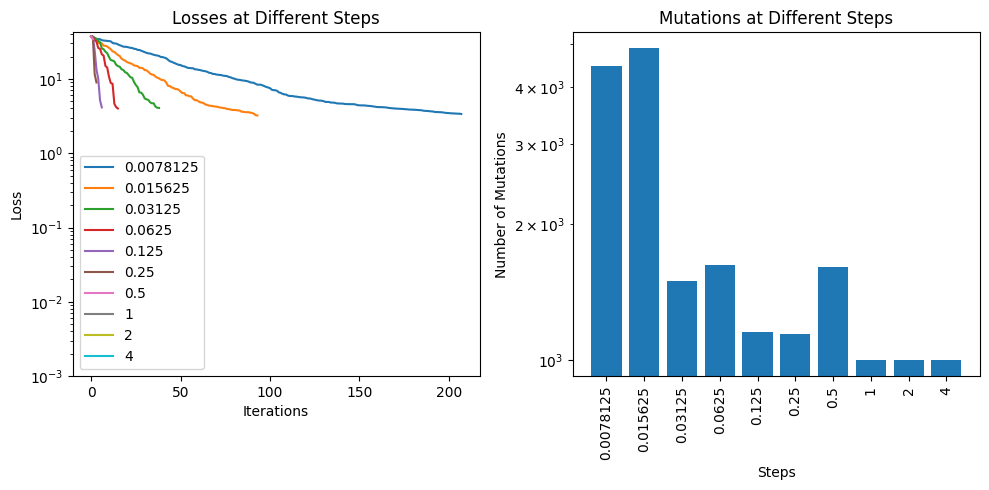

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

for i in range(len(steps)):
    plt.plot(losses[i],label=str(steps[i]))

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Losses at Different Steps')
plt.yscale('log')
plt.ylim(1e-3)
plt.legend()

# Plot the bar chart of mutations
plt.subplot(1, 2, 2)
plt.bar([str(s) for s in steps], mutations)
plt.xlabel('Steps')
plt.ylabel('Number of Mutations')
plt.title('Mutations at Different Steps')
plt.yscale('log')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [29]:
netSin.reset()
steps = [2**(-3-i) for i in range(5)]
losses = []
mutations = []

for step in steps:
    mut = 0
    fin_loss = 0
    for i in range(10):
        loss,data = Learning.random_learning(netSin,LossFunction,1000,1000,step,1e-3)
        fin_loss += loss[-1]
        mut += data[1]
        netSin.reset()

    losses.append(fin_loss)
    mutations.append(mut)
    print('Step Finished',step)

Step Finished 0.125
Step Finished 0.0625
Step Finished 0.03125
Step Finished 0.015625
Step Finished 0.0078125


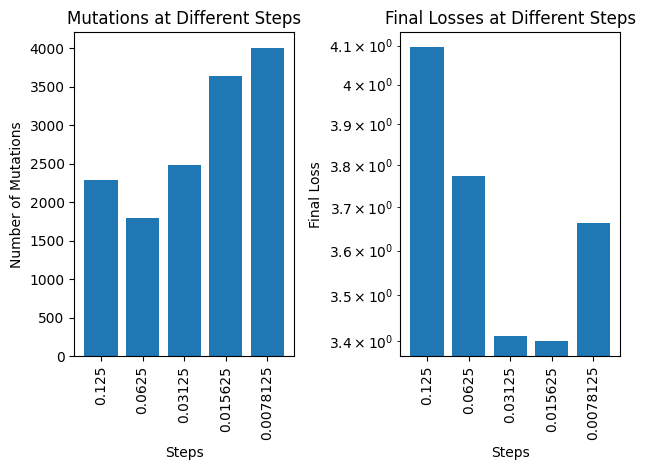

In [30]:
plt.subplot(1, 2, 1)
plt.bar([str(s) for s in steps], np.array(mutations)/10)
plt.xlabel('Steps')
plt.ylabel('Number of Mutations')
plt.title('Mutations at Different Steps')
plt.xticks(rotation=90)
#plt.yscale('log')

plt.subplot(1, 2, 2)
plt.bar([str(s) for s in steps], np.array(losses)/10)
plt.xlabel('Steps')
plt.ylabel('Final Loss')
plt.title('Final Losses at Different Steps')
plt.yscale('log')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Conclusion

After investigating these 3 test cases a step of $2^{-5}$ appears to be the best performing step size. Thus we will set this as default in Learning.py